In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from lane_detection import *
from lane_following import *

In [2]:
img = cv2.imread("pool.png")

[[[3052 1178 3726 1309]]

 [[1044 2066 1405 1465]]

 [[1006 2132 1393 1488]]

 [[1066 2026 1433 1415]]

 [[1427 2133 1553 1587]]]


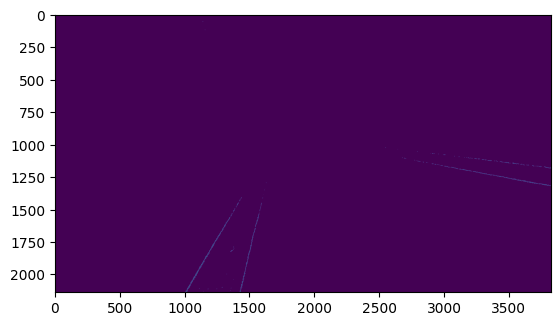

In [3]:
lines = detect_lines(img, 49, 50, 3, 500, 40)
print(lines)

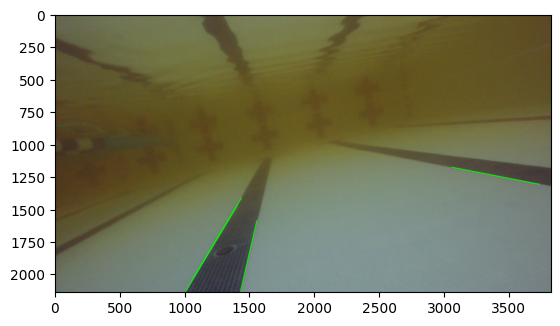

In [4]:
plt.imshow(draw_lines(img, lines))

In [5]:
get_slopes_intercepts(lines)

([0.1943620178041543,
  -1.664819944598338,
  -1.6640826873385013,
  -1.664850136239782,
  -4.333333333333333],
 [8104.427480916031,
  987.5374376039933,
  989.1739130434783,
  985.5122749590835,
  1420.7692307692307])

In [6]:
lanes = detect_lanes(lines)
print(lanes)

[[[987.5374376039933, 2160, 1691.0519031141869, 988.7750865051903], [1420.7692307692307, 2160, 1691.0519031141869, 988.7750865051903]], [[989.1739130434783, 2160, 1689.837366892546, 994.0380767989673], [1420.7692307692307, 2160, 1689.837366892546, 994.0380767989673]], [[985.5122749590835, 2160, 1692.3233492171546, 983.2654867256635], [1420.7692307692307, 2160, 1692.3233492171546, 983.2654867256635]]]


3
___
[[987.5374376039933, 2160, 1691.0519031141869, 988.7750865051903], [1420.7692307692307, 2160, 1691.0519031141869, 988.7750865051903]]
___
[[987.5374376039933, 2160, 1691.0519031141869, 988.7750865051903], [1420.7692307692307, 2160, 1691.0519031141869, 988.7750865051903]]
___
[[989.1739130434783, 2160, 1689.837366892546, 994.0380767989673], [1420.7692307692307, 2160, 1689.837366892546, 994.0380767989673]]
___
[[989.1739130434783, 2160, 1689.837366892546, 994.0380767989673], [1420.7692307692307, 2160, 1689.837366892546, 994.0380767989673]]
___
[[985.5122749590835, 2160, 1692.3233492171546, 983.2654867256635], [1420.7692307692307, 2160, 1692.3233492171546, 983.2654867256635]]
___
[[985.5122749590835, 2160, 1692.3233492171546, 983.2654867256635], [1420.7692307692307, 2160, 1692.3233492171546, 983.2654867256635]]


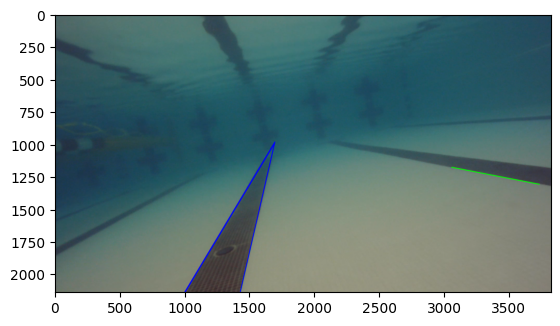

In [7]:
print(len(lanes))
lane_img = draw_lanes(img, lanes)
plt.imshow(cv2.cvtColor(lane_img, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
video = cv2.VideoCapture('AUV_Vid1.mkv')

fps = int(video.get(cv2.CAP_PROP_FPS))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_file = 'output_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter(output_file, fourcc, 30, (width, height))

ret = True
while ret:
    ret, frame = video.read()
    lines = detect_lines(frame, 50, 90, 3,150,10)
    print(lines)
        #try: 
        #    frame = draw_lines(frame, lines,(0, 255, 0))
        #    print ("tried to draw lines")
        #except :
       #     pass
    try:
        lanes = detect_lanes(lines)
        # print ("tried to detect lanes")
        closest_lane = get_center_lane(lanes)
        frame = draw_lane(frame, closest_lane, (255, 0, 0))
        frame = draw_lines(frame, lines,(0, 255, 0))
        avg_x_intercept, avg_slope = get_lane_center(closest_lane)
        x = closest_lane[0][2]
        y = closest_lane[0][3]
        cv2.line(frame, (int(avg_x_intercept), 1080), (int(x), int(y)), (0,0,255), 3)
        print(recommend_direction(avg_x_intercept, avg_slope))
        output_video.write(frame)
    except:
        pass
        
        
    # recommend_direction(avg_x_intercept, avg_slope)
    

video.release()
output_video.release()

[[[1365  789 1544  865]]

 [[1687  925 1891 1011]]

 [[1725  887 1898  950]]

 [[1288  757 1704  933]]

 [[ 843  849  959 1077]]

 [[1621  848 1803  914]]]
go left + turn right
[[[1384  797 1745  950]]

 [[1541  819 1883  944]]

 [[1641  905 1841  990]]

 [[ 843  848  959 1077]]

 [[ 855  870  961 1078]]

 [[1739  946 1918 1022]]]
go left + turn right
[[[1595  886 1839  989]]

 [[1373  793 1621  898]]

 [[1532  815 1804  914]]

 [[1619  848 1886  945]]

 [[ 838  837  959 1075]]

 [[1714  935 1910 1018]]]
go left + turn right
[[[1618  847 1897  948]]

 [[1687  924 1866 1000]]

 [[1393  801 1734  945]]

 [[ 878  917  960 1079]]]
[[[1308  764 1714  936]]

 [[1531  814 1807  915]]

 [[1624  897 1812  977]]

 [[ 839  838  961 1078]]

 [[ 842  847  947 1052]]]
go left + turn right
[[[1543  818 1897  947]]

 [[1354  783 1724  940]]

 [[ 816  793  960 1076]]

 [[1710  932 1866  998]]

 [[ 825  812  933 1024]]]
[[[1566  825 1901  947]]

 [[1520  853 1713  934]]

 [[ 823  806  960 1075]]

 [[167

/home/keshav/cv-intro/lane_detection.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (y2 - y1) / (x2 - x1)
/home/keshav/cv-intro/lane_detection.py:72: RuntimeWarning: invalid value encountered in scalar divide
  x = (slopes[i] * intercepts[i] - slopes[j] * intercepts[j]) / (


[[[ 901  568 1046 1013]]

 [[ 970  784 1026  958]]

 [[1725  567 1917  637]]]
[[[939 675 996 862]]

 [[786 999 789 834]]

 [[887 509 970 779]]]
go forward + turn left
[[[ 781 1079  784  901]]

 [[ 887  502  966  759]]

 [[ 934  651 1005  884]]]
go forward + turn left
[[[ 869  434 1064 1073]]]
[[[ 916  585 1022  931]]

 [[ 938  654  987  813]]

 [[ 986  816 1064 1072]]

 [[ 863  411  934  641]]]
[[[ 916  578 1036  972]]

 [[ 864  406  923  596]]

 [[ 988  819 1067 1078]]]
[[[ 893  494  977  771]]

 [[ 972  761 1020  918]]

 [[1639  476 1919  572]]

 [[ 945  667 1038  973]]

 [[ 762 1077  770  923]]

 [[1009  883 1068 1076]]]
go forward + turn left
[[[1593  452 1911  561]]

 [[ 946  668 1024  923]]

 [[ 918  573  973  753]]]
[[[ 893  476  983  787]]

 [[1720  489 1885  543]]

 [[ 943  647 1017  905]]

 [[ 873  411  941  647]]]
[[[ 881  427 1011  881]]

 [[ 764  860  774  707]]

 [[1731  485 1919  546]]

 [[ 967  725 1030  944]]]
go forward + turn left
[[[ 945  645 1007  861]]

 [[ 966  7

/home/keshav/cv-intro/lane_detection.py:55: RuntimeWarning: invalid value encountered in scalar divide
  slope_ratio = abs(min_slope / max_slope)


[[[ 902  934 1029  602]]

 [[1093 1079 1093  785]]

 [[1099 1079 1099  769]]

 [[1125  575 1170  789]]

 [[1066 1077 1079  827]]

 [[ 979 1038 1017  842]]

 [[1131  797 1160 1079]]

 [[1027 1078 1055  809]]

 [[ 877 1079  952  860]]

 [[1159  851 1189 1041]]

 [[ 940 1078  998  842]]

 [[1060 1077 1073  816]]

 [[1155  787 1201 1079]]

 [[ 870 1079  948  854]]

 [[ 941 1046  987  861]]

 [[ 985  976 1015  823]]

 [[1160  744 1216 1007]]

 [[1013 1010 1040  821]]

 [[1114  841 1126 1079]]

 [[1138  809 1166 1079]]

 [[1034 1072 1055  866]]

 [[1034 1079 1058  849]]]
go forward + turn right
[[[ 843 1077 1015  629]]

 [[1114  530 1199  933]]

 [[1113  852 1125 1079]]

 [[1115  777 1130 1056]]

 [[1136  855 1159 1076]]

 [[1091 1019 1091  772]]

 [[ 962 1079 1013  819]]

 [[1059 1077 1070  862]]

 [[ 857 1042  931  849]]

 [[1011 1009 1045  774]]

 [[1165  852 1200 1079]]

 [[1162  760 1205  966]]

 [[1098 1079 1098  880]]

 [[1025 1079 1050  838]]

 [[ 874 1079  960  829]]

 [[ 895 1000  

/home/keshav/cv-intro/lane_detection.py:37: RuntimeWarning: divide by zero encountered in scalar divide
  x_intercept = (res - y2) / slope + x2
/home/keshav/cv-intro/lane_detection.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  slope_ratio = abs(min_slope / max_slope)
/home/keshav/cv-intro/lane_detection.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  slope_difference = abs(1 / slopes[i] - 1 / slopes[j])


[[[ 165  968  385  776]]

 [[ 552  917  654  688]]

 [[1394  438 1707  438]]

 [[ 212  926  380  780]]]
go right + turn left
[[[ 173  944  347  798]]

 [[ 571  850  649  684]]

 [[ 535  926  643  694]]

 [[ 507  983  615  753]]

 [[  64 1037  217  908]]]
go right + turn left
[[[ 123  976  310  819]]

 [[ 501  972  639  689]]

 [[ 116  980  392  749]]

 [[ 485 1001  580  806]]]
go right + turn left
[[[  74 1008  368  762]]

 [[ 194  909  376  756]]

 [[ 519  912  627  700]]

 [[  12 1055  182  917]]

 [[ 475  678  629  535]]]
go right + turn left
[[[   0 1064  284  834]]

 [[  14 1050  181  915]]

 [[ 210  891  370  761]]

 [[ 426 1079  515  911]]

 [[ 497  942  625  700]]

 [[ 541  856  628  692]]]
go right + turn left
[[[   8 1056  171  924]]

 [[ 171  923  350  778]]

 [[  64 1012  277  839]]

 [[ 419 1076  556  820]]

 [[ 518  895  607  727]]

 [[ 444  964  537  809]]]
go right + turn left
[[[   5 1064  269  851]]

 [[ 518  890  612  720]]

 [[   1 1066  324  804]]

 [[   1 1067  29

/home/keshav/cv-intro/lane_detection.py:54: RuntimeWarning: invalid value encountered in scalar divide
  intercept_ratio = abs(min_intercept / max_intercept)
/home/keshav/cv-intro/lane_detection.py:56: RuntimeWarning: invalid value encountered in scalar subtract
  slope_difference = abs(1 / slopes[i] - 1 / slopes[j])
/home/keshav/cv-intro/lane_detection.py:64: RuntimeWarning: invalid value encountered in scalar subtract
  max_intercept - min_intercept > 100


[[[1169  925 1669 1031]]

 [[1402  973 1561 1006]]

 [[ 898  946 1137 1023]]

 [[1635  663 1815  660]]

 [[1074 1002 1285 1070]]

 [[1050  898 1270  945]]]
go left + turn right
[[[1336  967 1561 1015]]

 [[1377  975 1555 1012]]

 [[1219  943 1385  978]]

 [[1394  668 1544  665]]

 [[1028  998 1270 1076]]

 [[ 787  921 1024  998]]]
go left + turn right
[[[1279  962 1476 1003]]

 [[1171  940 1337  975]]

 [[1477 1003 1694 1049]]

 [[1023 1006 1242 1077]]

 [[ 911  972 1089 1029]]]
[[[1611  666 1792  663]]

 [[1272  967 1494 1014]]

 [[ 996  910 1228  959]]

 [[1092  930 1315  977]]

 [[1053 1028 1215 1078]]

 [[ 834  959  985 1006]]]
[[[1046  928 1229  966]]

 [[ 806  962 1104 1053]]

 [[1235  969 1421 1005]]

 [[1462 1013 1669 1054]]

 [[1424  671 1604  668]]]
go left + turn right
[[[ 752  955 1152 1078]]

 [[1529  670 1684  665]]

 [[ 643  921  890  997]]]
[[[1014  936 1274  987]]

 [[1390 1011 1741 1079]]

 [[ 848  994 1127 1079]]

 [[1581  669 1746  663]]

 [[1210  977 1404 1014]]

 

/home/keshav/cv-intro/lane_detection.py:72: RuntimeWarning: divide by zero encountered in scalar divide
  x = (slopes[i] * intercepts[i] - slopes[j] * intercepts[j]) / (


[[[1520  243 1550  399]]

 [[1538  524 1616  924]]

 [[1727  703 1774  924]]

 [[1550  199 1611  513]]

 [[1815  747 1875 1030]]

 [[1548  226 1605  520]]

 [[1640  264 1685  497]]

 [[1576  140 1651  524]]

 [[1570  717 1607  908]]

 [[1646  506 1700  764]]

 [[1575  159 1639  492]]

 [[1724  493 1759  661]]

 [[1541  725 1595 1004]]

 [[1582  564 1618  747]]

 [[1239    2 1277  213]]

 [[1555  231 1602  473]]

 [[1667  199 1698  357]]

 [[1623  207 1701  606]]

 [[1717  487 1773  750]]

 [[1465  139 1503  339]]

 [[1639  656 1676  845]]

 [[1508  176 1546  374]]

 [[1364  697 1408  946]]

 [[1337  552 1365  711]]

 [[1436  548 1483  794]]

 [[1526  498 1569  717]]

 [[1637  673 1671  846]]

 [[1375   22 1419  272]]

 [[1626  200 1671  429]]

 [[1703  586 1739  758]]

 [[1730  745 1789 1022]]

 [[1640  503 1694  760]]

 [[1457  838 1495 1034]]

 [[1693  759 1750 1028]]

 [[1839  856 1876 1029]]

 [[1518  825 1559 1034]]

 [[1698  758 1733  924]]

 [[1513  773 1545  936]]

 [[1759  481

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Error in callback <function _draw_all_if_interactive at 0x7f4d0a5280> (for post_execute):


KeyboardInterrupt: 